# PHYS 381 - Assignment 2
### Siegfried Peschke - 30032136
#### Febraury 4, 2019

## Introduction
In this assignment we utilize the package scipy.integrate.romberg in order to evaluate a specific integral. The goal is to explore this package and vary the tolerance of the evaluation to determine the computational impact by tracking the number of times the integrand is calculated. We will then explore how applying a change of coordinates effects the efficiency and result of computational integration.

## Evaluating an Integral with scipy.integrate.romberg
### Part 1 - Cartesian Coordinates
Use scipy.integrate.romberg to evaluate the triple integral

$$ \int_{x=0}^1 \int_{y=0}^{\sqrt{1-x^2}} \int_{z=0}^{\sqrt{1-x^2-y^2}} \frac{dz \, dy \, dx}{1 + x^2 + y^2 + z^2} $$

and determine the number of calls $N$ to the integrand.

In [1]:
import numpy as np
from scipy.integrate import romberg
import matplotlib.pyplot as plt

In order to calculate the given integral, we will create a function which evaluates the integral in a chain. We do this by first creating the integrand as a mathematical function. Then pass the integrand into scipy.integrate.romberg to evaluate the first integral with given bounds. This returns another integrand for the following integral. Repeat the process for each integral until all three are evaluated, then return the final value.

In [2]:
def tripleintegrate_cart(tol, divmax = 20):
    '''
    Parameters:
        tol = Sets the tolerance used in scipy.integrate.romberg.
        divmax = Sets the maximum divisions used in scipy.integrate.romberg.
        
    Returns:
        The numberical result of the given integral.
    '''
    def integrand_x(x):
        def integrand_y(y):
            def integrand_z(z):
                global N
                N += 1 #Integrand iterations tracker.
                return 1/(1+(x**2)+(y**2)+(z**2)) #Create the integrand.
            a = 0.0 #Lower bound of dz integral.
            b = np.sqrt(np.abs(1-(x**2)-(y**2))) #Upper bound of dz integral.
            return romberg(integrand_z, a, b, divmax = divmax, tol = tol) #Calculate and return the integral
        a = 0.0
        b = np.sqrt(np.abs(1-(x**2)))
        return romberg(integrand_y, a, b, divmax = divmax, tol = tol)
    a = 0.0
    b = 1.0
    return romberg(integrand_x, a, b, divmax = divmax, tol = tol)

Now we generate the integral values for a variety of tolerances using tripleintegrate_cart whilst keeping track of the number of iterations performed on the integrand.

In [3]:
tol = 1.0
tol_cart_list = []
N_cart_list = []
while tol >= 1.0e-7:
    N = 0
    print("With tolerance =", str('%.1e' %tol), "the integral is", 
          tripleintegrate_cart(tol), "with", N, "iterations.")
    tol_cart_list.append(tol)
    N_cart_list.append(N)
    tol = tol * 0.1

With tolerance = 1.0e+00 the integral is 0.3234114395499588 with 27 iterations.
With tolerance = 1.0e-01 the integral is 0.3257807257620959 with 33 iterations.
With tolerance = 1.0e-02 the integral is 0.335071956272606 with 149 iterations.
With tolerance = 1.0e-03 the integral is 0.3368817778045251 with 645 iterations.
With tolerance = 1.0e-04 the integral is 0.33706953107789955 with 6063 iterations.
With tolerance = 1.0e-05 the integral is 0.3370923350921286 with 78253 iterations.
With tolerance = 1.0e-06 the integral is 0.3370953613758728 with 419651 iterations.
With tolerance = 1.0e-07 the integral is 0.33709574658076724 with 7350025 iterations.


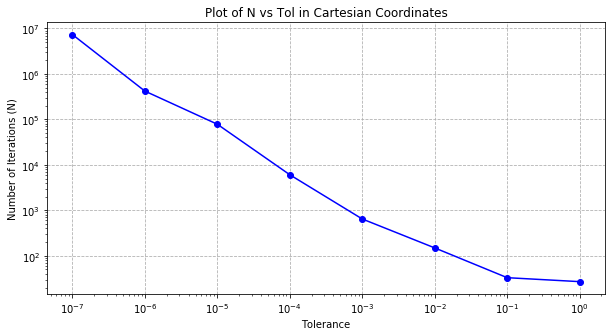

In [4]:
#Create the plot
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Tolerance")
plt.ylabel("Number of Iterations (N)")
plt.title("Plot of N vs Tol in Cartesian Coordinates")
plt.grid(linestyle='dashed')

#Plot the data points
plt.plot(tol_cart_list, N_cart_list, color = 'blue', marker = 'o')

plt.show()

Analyzing the plot for cartesian coordinates, we can see that a lower tolerance is required to achieve a more precise integral value. We know that the computer has not yet reached it's maximum precision for the integral value since the number of iterations continues to increase as the tolerance is decreased without convergence. If we allow the computer more time, it will be able to calculate at lower tolerances in order to achieve a more precise value of the integral.

### Part 2 - Spherical Coordinates
Converting the integral into spherical coordinates yields

$$ \int_{\theta=0}^{\pi/2} \int_{\phi=0}^{\pi/2} \int_{\rho=0}^1 \frac{\rho^2 \sin\phi \, d\rho \, d\phi \, d\theta}{1 + \rho^2} $$

We will now repeat part 1 for this change of coordinates.

In [5]:
def tripleintegrate_sphere(tol, divmax = 20):
    '''
    Parameters:
        tol = Sets the tolerance used in scipy.integrate.romberg.
        divmax = Sets the maximum divisions used in scipy.integrate.romberg.
        
    Returns:
        The numberical result of the given integral.
    '''
    def integrand_theta(t):
        def integrand_phi(p):
            def integrand_rho(r):
                global N
                N += 1 #Integrand iterations tracker.
                return (r**2)*np.sin(p)/(1+(r**2)) #Create the integrand.
            a = 0.0 #Lower bound of dz integral.
            b = 1 #Upper bound of dz integral.
            return romberg(integrand_rho, a, b, divmax = divmax, tol = tol) #Calculate and return the integral
        a = 0.0
        b = np.pi / 2
        return romberg(integrand_phi, a, b, divmax = divmax, tol = tol)
    a = 0.0
    b = np.pi / 2
    return romberg(integrand_theta, a, b, divmax = divmax, tol = tol)

Again generate the integral values for a variety of tolerances using tripleintegrate_sphere whilst keeping track of the number of iterations performed on the integrand.

In [6]:
tol = 1.0
tol_sphere_list = []
N_sphere_list = []
while tol >= 1.0e-10:
    N = 0
    print("With tolerance =", str('%.1e' %tol), "the integral is", 
          tripleintegrate_sphere(tol), "with", N, "iterations.")
    tol_sphere_list.append(tol)
    N_sphere_list.append(N)
    tol = tol * 0.1

With tolerance = 1.0e+00 the integral is 0.34111513583012737 with 27 iterations.
With tolerance = 1.0e-01 the integral is 0.34111513583012737 with 27 iterations.
With tolerance = 1.0e-02 the integral is 0.3368867707010082 with 69 iterations.
With tolerance = 1.0e-03 the integral is 0.33705099088728735 with 105 iterations.
With tolerance = 1.0e-04 the integral is 0.3370966819422417 with 321 iterations.
With tolerance = 1.0e-05 the integral is 0.3370957748142048 with 417 iterations.
With tolerance = 1.0e-06 the integral is 0.33709577580995265 with 1305 iterations.
With tolerance = 1.0e-07 the integral is 0.33709577663903173 with 1593 iterations.
With tolerance = 1.0e-08 the integral is 0.33709577663903173 with 1593 iterations.
With tolerance = 1.0e-09 the integral is 0.33709577663903173 with 1593 iterations.
With tolerance = 1.0e-10 the integral is 0.33709577663903173 with 1593 iterations.


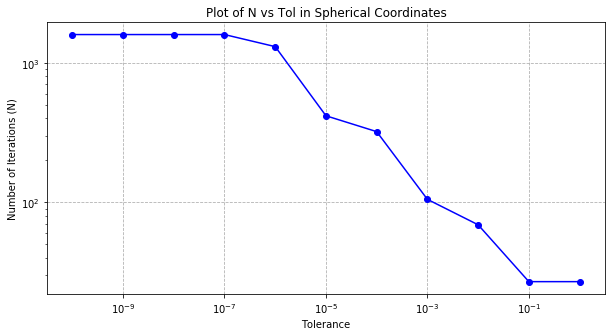

In [7]:
#Create the plot
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Tolerance")
plt.ylabel("Number of Iterations (N)")
plt.title("Plot of N vs Tol in Spherical Coordinates")
plt.grid(linestyle='dashed')

#Plot the data points
plt.plot(tol_sphere_list, N_sphere_list, color = 'blue', marker = 'o')

plt.show()

Analyzing the plot for spherical coordinates we observe that the computer has reached a maximum precision for the value of the integral. This was achieved at a tolerance of $10^{-7}$ at 1593 iterations.

## Discussion
Comparing the two methods of evaluating the same integral we see that a change of coordinates may improve a computers ability to evaluate an integral. In spherical coordinates, the computer is able to reach a maximum precision value for the integral at a tolerance of $10^{-7}$ while the same method of evaluation in cartesian coordinates requires a smaller tolerance to achieve the same result. On top of this, the number of iterations in spherical coordinates is significantly less than the number of iterations in cartesian coordinates. This is very desirable since this yields a great improvement in computation time.

This makes sense since in cartesian coordinates, the function must evaluate at variable limits which depends on the inner integral and for every area the integrand must be calculated. In spherical coordinates, the limits are constants and thus not every calculation requires the integrand to be evaluated.

In [8]:
print("Evaluation using Cartesian Coordinates")
tol = 1.0
while tol > 1.0e-6: #Did not include 1.0e-7 for time sake.
    print("   Tolerance =", '%.1e' %tol)
    %timeit tripleintegrate_cart(tol)
    tol = tol * 0.1
    
print()
    
print("Evaluation using Spherical Coordinates")
tol = 1.0
while tol > 1.0e-10:
    print("   Tolerance =", '%.1e' %tol)
    %timeit tripleintegrate_sphere(tol)
    tol = tol * 0.1

Evaluation using Cartesian Coordinates
   Tolerance = 1.0e+00
467 µs ± 6.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
   Tolerance = 1.0e-01
575 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
   Tolerance = 1.0e-02
2.41 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
   Tolerance = 1.0e-03
8.99 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
   Tolerance = 1.0e-04
77 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
   Tolerance = 1.0e-05
824 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
   Tolerance = 1.0e-06
3.75 s ± 35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Evaluation using Spherical Coordinates
   Tolerance = 1.0e+00
459 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
   Tolerance = 1.0e-01
465 µs ± 8.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
   Tolerance = 1.0e-02
1.16 ms ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 100

Using %timeit to compare the two methods we find a glaring difference which supports the conclusion that less iterations greatly reduces the computation time.

## Conclusion
We learn a few key concepts in this assignment. Begining with handling an unevaluated mathematical function. We utilize scipy.integrate.romberg to perform an integral i.e. find the area under the curve over an interval. We notice that the romberg function takes an unevaluated mathematical function as input and outputs a value. We then had to explore how to utilize the romberg function to chain integrals together. Furthermore, we learned that simplifying an integral by changing the coordinates greatly reduces computation time and makes it much easier for a computer to arrive at a maximum precision value.